In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 98% !important }<style>"))

# Analysis

In [2]:
from utilities import *
from models import *

In [3]:
pin_file = "../Data/pin.csv"

pin = read_pin(pin_file)

In [4]:
filename = "../Data/rssi5.csv"
B1 = "0117C55D14E4"

data = read_data(filename, B1)

All beacons: ['0117C55D14E4']
Selecting 0117C55D14E4


In [5]:
data[scanners] = min_max_scaling(data[scanners])

In [6]:
data.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,3219.000000,3140.000000,2388.000000,3396.000000,3168.000000,3347.000000,3461.000000,3819.000000,4928.000000,2340.000000,3180.000000,3074.000000,3378.000000,3859.000000,3303.000000,2179.000000,3539.000000
mean,0.438490,0.402463,0.354355,0.426232,0.437463,0.425197,0.421501,0.427935,0.419207,0.368105,0.387825,0.468933,0.499724,0.372234,0.420169,0.296665,0.402562
std,0.151902,0.130322,0.120450,0.142455,0.114273,0.156658,0.155481,0.146579,0.196955,0.179789,0.184707,0.130727,0.130346,0.153890,0.143028,0.135034,0.135141
min,0.050000,0.033333,0.050000,0.033333,0.050000,0.033333,0.050000,0.050000,0.033333,0.033333,0.033333,0.066667,0.066667,0.033333,0.033333,0.033333,0.033333
25%,0.333333,0.300000,0.266667,0.329167,0.366667,0.300000,0.283333,0.300000,0.283333,0.216667,0.216667,0.383333,0.416667,0.216667,0.316667,0.183333,0.300000
50%,0.466667,0.416667,0.350000,0.416667,0.450000,0.450000,0.416667,0.450000,0.416667,0.333333,0.400000,0.466667,0.500000,0.416667,0.416667,0.283333,0.416667
75%,0.533333,0.516667,0.450000,0.550000,0.533333,0.550000,0.550000,0.550000,0.516667,0.533333,0.550000,0.550000,0.600000,0.516667,0.516667,0.416667,0.516667
max,0.733333,0.616667,0.600000,0.700000,0.683333,0.750000,0.783333,0.650000,0.850000,0.700000,0.800000,0.750000,0.766667,0.633333,0.733333,0.566667,0.666667


## Train Validation Test Split

In [7]:
train, validation, test = train_validation_test_split(data)

In [8]:
train.groupby("location")[scanners].count()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
location,,,,,,,,,,,,,,,,,
V1_10,204,101,81,194,172,80,73,258,0,166,89,119,194,300,146,4,218
V1_11,49,64,74,92,117,81,60,87,110,43,55,135,123,27,38,24,78
V1_12,68,79,56,91,82,85,52,55,161,48,64,155,120,81,103,53,71
V1_13,70,139,56,108,43,88,97,109,258,10,43,118,85,84,148,12,59
V1_14,29,146,38,79,57,91,248,65,203,16,113,44,82,95,161,70,88
V1_18,53,22,49,82,40,31,28,222,2,63,35,54,55,210,23,0,157
V1_19,291,88,81,152,246,75,59,289,36,131,46,138,245,272,102,92,208
V1_20,112,110,92,73,121,83,66,80,80,32,68,86,160,15,88,23,66
V1_21,66,143,70,71,98,87,132,53,149,21,96,97,85,61,82,67,63


In [9]:
train.shape

(29797, 19)

In [10]:
validation.shape

(9933, 19)

In [11]:
train.sort_values("time", inplace=True)
validation.sort_values("time", inplace=True)
test.sort_values("time", inplace=True)

In [12]:
train_rolled = train.groupby("location").rolling(30, min_periods=1).mean().reset_index()
validation_rolled = validation.groupby("location").rolling(30, min_periods=1).mean().reset_index()
test_rolled = test.groupby("location").rolling(30, min_periods=1).mean().reset_index()

In [13]:
train_rolled

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_10,30171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
1,V1_10,30172,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
2,V1_10,30173,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,NaN,NaN,NaN
3,V1_10,30177,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,NaN,0.183333,NaN,0.566667,NaN,NaN,NaN,NaN
4,V1_10,30179,0.533333,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,0.316667,0.183333,NaN,0.566667,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29792,V1_9,43166,0.433333,0.283333,0.366667,0.613333,0.483333,NaN,NaN,0.591667,NaN,0.166667,0.225000,0.561111,0.350000,0.475,NaN,0.133333,0.366667
29793,V1_9,43167,0.433333,0.283333,0.366667,0.613333,0.483333,NaN,NaN,0.622222,NaN,0.166667,0.225000,0.561111,0.350000,0.475,NaN,0.125000,0.366667
29794,V1_9,43168,0.433333,0.283333,0.366667,0.613333,0.483333,NaN,NaN,0.622222,NaN,0.166667,0.183333,0.561111,0.400000,0.475,NaN,0.125000,0.366667
29795,V1_9,43169,0.433333,0.283333,0.366667,0.613333,0.483333,NaN,NaN,0.622222,NaN,0.166667,0.183333,0.561111,0.400000,0.475,NaN,0.125000,0.366667


## Imputation
1. Forward fill
2. Fill NaN

In [14]:
train_imputed = train_rolled.set_index("location").groupby("location").ffill()
train_imputed.fillna(0, inplace=True)
train_imputed.reset_index(inplace=True)

In [15]:
validation_imputed = validation_rolled.set_index("location").groupby("location").ffill()
validation_imputed.fillna(0, inplace=True)
validation_imputed.reset_index(inplace=True)

In [16]:
test_imputed = test_rolled.set_index("location").groupby("location").ffill()
test_imputed.fillna(0, inplace=True)
test_imputed.reset_index(inplace=True)

## Change Location to Coordinates

In [17]:
train_imputed["X"] = train_imputed["location"].apply(lambda x: pin[x]["X"])
train_imputed["Y"] = train_imputed["location"].apply(lambda x: pin[x]["Y"])

In [18]:
validation_imputed["X"] = validation_imputed["location"].apply(lambda x: pin[x]["X"])
validation_imputed["Y"] = validation_imputed["location"].apply(lambda x: pin[x]["Y"])

In [19]:
test_imputed["X"] = test_imputed["location"].apply(lambda x: pin[x]["X"])
test_imputed["Y"] = test_imputed["location"].apply(lambda x: pin[x]["Y"])

## Model Training

In [20]:
X_train, y_train = train_imputed[scanners].values, train_imputed[["X", "Y"]].values
X_validation, y_validation = validation_imputed[scanners].values, validation_imputed[["X", "Y"]].values
X_test, y_test = test_imputed[scanners].values, test_imputed[["X", "Y"]].values

In [21]:
model = MLPRegressor(model_type='small')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train, X_validation, y_validation)

Train on 29797 samples, validate on 9933 samples
Epoch 1/1000
29797/29797 [==============================] - 2s 60us/sample - loss: 25.6269 - mae: 3.2538 - mse: 25.2860 - val_loss: 4.8996 - val_mae: 1.6209 - val_mse: 4.4933
Epoch 2/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 2.9668 - mae: 1.2300 - mse: 2.5391 - val_loss: 3.1319 - val_mae: 1.2049 - val_mse: 2.6918
Epoch 3/1000
29797/29797 [==============================] - 1s 39us/sample - loss: 2.2504 - mae: 1.0316 - mse: 1.8093 - val_loss: 2.4805 - val_mae: 1.0407 - val_mse: 2.0387
Epoch 4/1000
29797/29797 [==============================] - 1s 36us/sample - loss: 1.9743 - mae: 0.9302 - mse: 1.5217 - val_loss: 2.3340 - val_mae: 0.9920 - val_mse: 1.8775
Epoch 5/1000
29797/29797 [==============================] - 1s 38us/sample - loss: 1.8385 - mae: 0.8735 - mse: 1.3772 - val_loss: 2.1833 - val_mae: 0.9356 - val_mse: 1.7252
Epoch 6/1000
29797/29797 [==============================] - 1s 50us/sample - loss: 1

Epoch 48/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9941 - mae: 0.4979 - mse: 0.4768 - val_loss: 1.5244 - val_mae: 0.7031 - val_mse: 1.0210
Epoch 49/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9899 - mae: 0.4953 - mse: 0.4730 - val_loss: 1.5084 - val_mae: 0.6872 - val_mse: 0.9836
Epoch 50/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9856 - mae: 0.4929 - mse: 0.4690 - val_loss: 1.4590 - val_mae: 0.6673 - val_mse: 0.9439
Epoch 51/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9822 - mae: 0.4910 - mse: 0.4661 - val_loss: 1.5548 - val_mae: 0.7156 - val_mse: 1.0220
Epoch 52/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9777 - mae: 0.4888 - mse: 0.4620 - val_loss: 1.4737 - val_mae: 0.6812 - val_mse: 0.9558
Epoch 53/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.9732 - mae: 0.4868 - mse: 0.4578 - val_loss:

Epoch 142/1000
29797/29797 [==============================] - 1s 49us/sample - loss: 0.8188 - mae: 0.4023 - mse: 0.3280 - val_loss: 1.3908 - val_mae: 0.6546 - val_mse: 0.9165
Epoch 143/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8187 - mae: 0.4024 - mse: 0.3281 - val_loss: 1.3401 - val_mae: 0.6231 - val_mse: 0.8432
Epoch 144/1000
29797/29797 [==============================] - 1s 32us/sample - loss: 0.8182 - mae: 0.4017 - mse: 0.3278 - val_loss: 1.3915 - val_mae: 0.6419 - val_mse: 0.8899
Epoch 145/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8168 - mae: 0.4016 - mse: 0.3265 - val_loss: 1.4738 - val_mae: 0.6978 - val_mse: 0.9655
Epoch 146/1000
29797/29797 [==============================] - 1s 30us/sample - loss: 0.8152 - mae: 0.4008 - mse: 0.3252 - val_loss: 1.4185 - val_mae: 0.6762 - val_mse: 0.9445
Epoch 147/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.8142 - mae: 0.3998 - mse: 0.3242 - val

Epoch 189/1000
29797/29797 [==============================] - 1s 30us/sample - loss: 0.7832 - mae: 0.3827 - mse: 0.3001 - val_loss: 1.3117 - val_mae: 0.6058 - val_mse: 0.8252
Epoch 190/1000
29797/29797 [==============================] - 1s 30us/sample - loss: 0.7814 - mae: 0.3815 - mse: 0.2983 - val_loss: 1.4860 - val_mae: 0.6967 - val_mse: 0.9822
Epoch 191/1000
29797/29797 [==============================] - 1s 30us/sample - loss: 0.7809 - mae: 0.3813 - mse: 0.2979 - val_loss: 1.3383 - val_mae: 0.6146 - val_mse: 0.8558
Epoch 192/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.7795 - mae: 0.3801 - mse: 0.2966 - val_loss: 1.3338 - val_mae: 0.6152 - val_mse: 0.8417
Epoch 193/1000
29797/29797 [==============================] - 1s 30us/sample - loss: 0.7792 - mae: 0.3800 - mse: 0.2965 - val_loss: 1.3673 - val_mae: 0.6324 - val_mse: 0.8722
Epoch 194/1000
29797/29797 [==============================] - 1s 30us/sample - loss: 0.7795 - mae: 0.3803 - mse: 0.2970 - val

Epoch 236/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7578 - mae: 0.3685 - mse: 0.2807 - val_loss: 1.2843 - val_mae: 0.5905 - val_mse: 0.8153
Epoch 237/1000
29797/29797 [==============================] - 1s 29us/sample - loss: 0.7571 - mae: 0.3678 - mse: 0.2802 - val_loss: 1.3181 - val_mae: 0.6189 - val_mse: 0.8503
Epoch 238/1000
29797/29797 [==============================] - 1s 29us/sample - loss: 0.7564 - mae: 0.3680 - mse: 0.2797 - val_loss: 1.4058 - val_mae: 0.6749 - val_mse: 0.9493
Epoch 239/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7563 - mae: 0.3673 - mse: 0.2796 - val_loss: 1.4025 - val_mae: 0.6614 - val_mse: 0.9097
Epoch 240/1000
29797/29797 [==============================] - 1s 30us/sample - loss: 0.7562 - mae: 0.3679 - mse: 0.2796 - val_loss: 1.2814 - val_mae: 0.5898 - val_mse: 0.8132
Epoch 241/1000
29797/29797 [==============================] - 1s 30us/sample - loss: 0.7569 - mae: 0.3680 - mse: 0.2804 - val

Epoch 283/1000
29797/29797 [==============================] - 1s 31us/sample - loss: 0.7390 - mae: 0.3585 - mse: 0.2668 - val_loss: 1.2961 - val_mae: 0.6056 - val_mse: 0.8329
Epoch 284/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7385 - mae: 0.3585 - mse: 0.2664 - val_loss: 1.2815 - val_mae: 0.5777 - val_mse: 0.8072
Epoch 285/1000
29797/29797 [==============================] - 1s 32us/sample - loss: 0.7375 - mae: 0.3577 - mse: 0.2654 - val_loss: 1.2669 - val_mae: 0.5712 - val_mse: 0.7960
Epoch 286/1000
29797/29797 [==============================] - 1s 41us/sample - loss: 0.7374 - mae: 0.3574 - mse: 0.2655 - val_loss: 1.3260 - val_mae: 0.6101 - val_mse: 0.8426
Epoch 287/1000
29797/29797 [==============================] - 1s 29us/sample - loss: 0.7375 - mae: 0.3574 - mse: 0.2656 - val_loss: 1.2718 - val_mae: 0.5913 - val_mse: 0.8008
Epoch 288/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7369 - mae: 0.3575 - mse: 0.2650 - val

Epoch 330/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7221 - mae: 0.3481 - mse: 0.2534 - val_loss: 1.3012 - val_mae: 0.5970 - val_mse: 0.8241
Epoch 331/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7216 - mae: 0.3484 - mse: 0.2528 - val_loss: 1.2650 - val_mae: 0.5819 - val_mse: 0.7998
Epoch 332/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7206 - mae: 0.3470 - mse: 0.2518 - val_loss: 1.3242 - val_mae: 0.6092 - val_mse: 0.8452
Epoch 333/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7210 - mae: 0.3476 - mse: 0.2523 - val_loss: 1.2789 - val_mae: 0.6008 - val_mse: 0.8185
Epoch 334/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7203 - mae: 0.3474 - mse: 0.2517 - val_loss: 1.2572 - val_mae: 0.5701 - val_mse: 0.7849
Epoch 335/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7196 - mae: 0.3468 - mse: 0.2509 - val

Epoch 377/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7058 - mae: 0.3379 - mse: 0.2392 - val_loss: 1.2344 - val_mae: 0.5664 - val_mse: 0.7685
Epoch 378/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7056 - mae: 0.3376 - mse: 0.2390 - val_loss: 1.2468 - val_mae: 0.5721 - val_mse: 0.7793
Epoch 379/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7052 - mae: 0.3375 - mse: 0.2387 - val_loss: 1.3687 - val_mae: 0.6502 - val_mse: 0.8892
Epoch 380/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7049 - mae: 0.3364 - mse: 0.2384 - val_loss: 1.2485 - val_mae: 0.5679 - val_mse: 0.7773
Epoch 381/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7039 - mae: 0.3361 - mse: 0.2374 - val_loss: 1.2246 - val_mae: 0.5620 - val_mse: 0.7615
Epoch 382/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.7039 - mae: 0.3364 - mse: 0.2375 - val

Epoch 424/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6918 - mae: 0.3281 - mse: 0.2276 - val_loss: 1.3259 - val_mae: 0.6328 - val_mse: 0.8516
Epoch 425/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6913 - mae: 0.3280 - mse: 0.2271 - val_loss: 1.2792 - val_mae: 0.5894 - val_mse: 0.8100
Epoch 426/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6914 - mae: 0.3284 - mse: 0.2273 - val_loss: 1.2822 - val_mae: 0.6205 - val_mse: 0.8343
Epoch 427/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6904 - mae: 0.3283 - mse: 0.2264 - val_loss: 1.3636 - val_mae: 0.6558 - val_mse: 0.8818
Epoch 428/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6904 - mae: 0.3281 - mse: 0.2262 - val_loss: 1.2631 - val_mae: 0.6077 - val_mse: 0.8063
Epoch 429/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6899 - mae: 0.3271 - mse: 0.2258 - val

Epoch 471/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6753 - mae: 0.3174 - mse: 0.2127 - val_loss: 1.2881 - val_mae: 0.6103 - val_mse: 0.8291
Epoch 472/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6758 - mae: 0.3176 - mse: 0.2133 - val_loss: 1.2295 - val_mae: 0.5702 - val_mse: 0.7729
Epoch 473/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6748 - mae: 0.3168 - mse: 0.2124 - val_loss: 1.2540 - val_mae: 0.5797 - val_mse: 0.7846
Epoch 474/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6749 - mae: 0.3173 - mse: 0.2124 - val_loss: 1.2202 - val_mae: 0.5642 - val_mse: 0.7566
Epoch 475/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6744 - mae: 0.3171 - mse: 0.2119 - val_loss: 1.2358 - val_mae: 0.5795 - val_mse: 0.7834
Epoch 476/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6746 - mae: 0.3169 - mse: 0.2123 - val

Epoch 518/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6643 - mae: 0.3107 - mse: 0.2040 - val_loss: 1.2428 - val_mae: 0.5859 - val_mse: 0.7813
Epoch 519/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6633 - mae: 0.3102 - mse: 0.2030 - val_loss: 1.2615 - val_mae: 0.5844 - val_mse: 0.7928
Epoch 520/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6631 - mae: 0.3102 - mse: 0.2028 - val_loss: 1.2320 - val_mae: 0.5668 - val_mse: 0.7664
Epoch 521/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6636 - mae: 0.3100 - mse: 0.2034 - val_loss: 1.2026 - val_mae: 0.5529 - val_mse: 0.7467
Epoch 522/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6633 - mae: 0.3098 - mse: 0.2031 - val_loss: 1.2129 - val_mae: 0.5587 - val_mse: 0.7583
Epoch 523/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6631 - mae: 0.3096 - mse: 0.2029 - val

Epoch 565/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6552 - mae: 0.3050 - mse: 0.1969 - val_loss: 1.2360 - val_mae: 0.5876 - val_mse: 0.7793
Epoch 566/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6544 - mae: 0.3050 - mse: 0.1961 - val_loss: 1.2229 - val_mae: 0.5619 - val_mse: 0.7622
Epoch 567/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6542 - mae: 0.3040 - mse: 0.1960 - val_loss: 1.2703 - val_mae: 0.5991 - val_mse: 0.8040
Epoch 568/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6546 - mae: 0.3043 - mse: 0.1964 - val_loss: 1.2177 - val_mae: 0.5595 - val_mse: 0.7588
Epoch 569/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6546 - mae: 0.3046 - mse: 0.1965 - val_loss: 1.1981 - val_mae: 0.5498 - val_mse: 0.7419
Epoch 570/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6539 - mae: 0.3040 - mse: 0.1958 - val

Epoch 612/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6469 - mae: 0.2988 - mse: 0.1901 - val_loss: 1.2553 - val_mae: 0.5762 - val_mse: 0.7916
Epoch 613/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6457 - mae: 0.2985 - mse: 0.1891 - val_loss: 1.2290 - val_mae: 0.5612 - val_mse: 0.7660
Epoch 614/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6456 - mae: 0.2982 - mse: 0.1889 - val_loss: 1.2137 - val_mae: 0.5519 - val_mse: 0.7588
Epoch 615/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6458 - mae: 0.2980 - mse: 0.1891 - val_loss: 1.2010 - val_mae: 0.5528 - val_mse: 0.7504
Epoch 616/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6453 - mae: 0.2985 - mse: 0.1887 - val_loss: 1.2297 - val_mae: 0.5615 - val_mse: 0.7705
Epoch 617/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6449 - mae: 0.2978 - mse: 0.1883 - val

Epoch 659/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6388 - mae: 0.2938 - mse: 0.1836 - val_loss: 1.2162 - val_mae: 0.5566 - val_mse: 0.7569
Epoch 660/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6378 - mae: 0.2927 - mse: 0.1825 - val_loss: 1.2113 - val_mae: 0.5509 - val_mse: 0.7537
Epoch 661/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6378 - mae: 0.2925 - mse: 0.1825 - val_loss: 1.2039 - val_mae: 0.5472 - val_mse: 0.7503
Epoch 662/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6376 - mae: 0.2933 - mse: 0.1824 - val_loss: 1.3531 - val_mae: 0.6398 - val_mse: 0.8843
Epoch 663/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6379 - mae: 0.2933 - mse: 0.1828 - val_loss: 1.3410 - val_mae: 0.6660 - val_mse: 0.9049
Epoch 664/1000
29797/29797 [==============================] - 1s 28us/sample - loss: 0.6374 - mae: 0.2928 - mse: 0.1823 - val

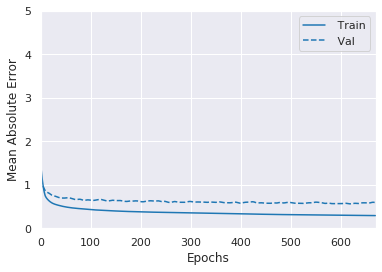

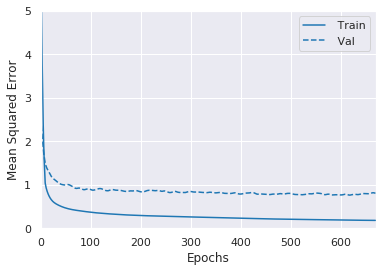

In [23]:
model.show_history()

## Model Validation

9933/1 - 0s - loss: 0.7144 - mae: 0.5614 - mse: 0.7697
Validation loss: 1.227565377803652
Mean absolute error: 0.56137455
Mean squared error: 0.76969546
Average distance error: 0.8746494820391091


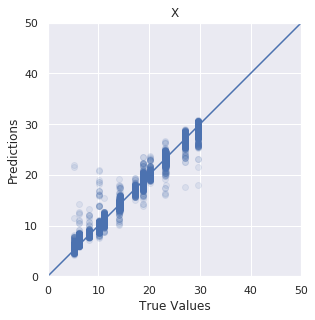

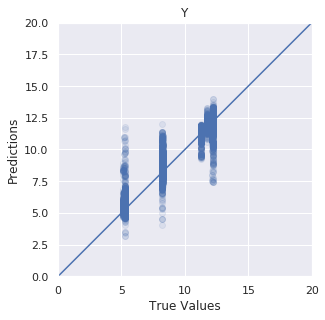

In [24]:
model.model_validation(X_validation, y_validation)

## Model Testing

9933/1 - 0s - loss: 0.6650 - mae: 0.4782 - mse: 0.7124
Test loss: 1.1659306488547887
Mean absolute error: 0.47823244
Mean squared error: 0.71237504
Average distance error: 0.7576086250816373


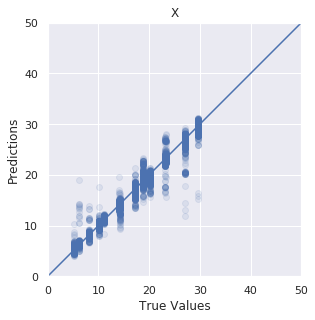

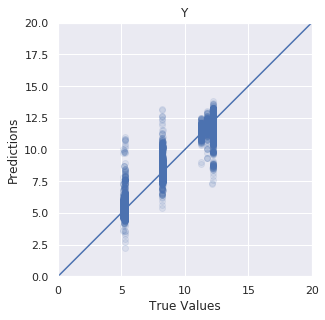

In [25]:
model.model_testing(X_test, y_test)

In [26]:
model.save('../Models/Small_MLP_Regression_Rolling_FFill_MinMax.h5')

## Plotting Learning Curves

train_loss = []
val_loss = []

for f in range(1, 11, 1):
    frac = f / 10.0
    sample = data.sample(frac=frac, random_state=12345)
    train, validation, test = train_validation_test_split(sample)

    train.sort_values("time", inplace=True)
    validation.sort_values("time", inplace=True)
    test.sort_values("time", inplace=True)

    train_rolled = train.groupby("location").rolling(15, min_periods=1).mean().reset_index()
    validation_rolled = validation.groupby("location").rolling(15, min_periods=1).mean().reset_index()
    test_rolled = test.groupby("location").rolling(15, min_periods=1).mean().reset_index()

    train_imputed = train_rolled.set_index("location").groupby("location").ffill()
    train_imputed.fillna(0, inplace=True)
    train_imputed.reset_index(inplace=True)

    validation_imputed = validation_rolled.set_index("location").groupby("location").ffill()
    validation_imputed.fillna(0, inplace=True)
    validation_imputed.reset_index(inplace=True)

    test_imputed = test_rolled.set_index("location").groupby("location").ffill()
    test_imputed.fillna(0, inplace=True)
    test_imputed.reset_index(inplace=True)

    train_imputed["X"] = train_imputed["location"].apply(lambda x: pin[x]["X"])
    train_imputed["Y"] = train_imputed["location"].apply(lambda x: pin[x]["Y"])

    validation_imputed["X"] = validation_imputed["location"].apply(lambda x: pin[x]["X"])
    validation_imputed["Y"] = validation_imputed["location"].apply(lambda x: pin[x]["Y"])

    test_imputed["X"] = test_imputed["location"].apply(lambda x: pin[x]["X"])
    test_imputed["Y"] = test_imputed["location"].apply(lambda x: pin[x]["Y"])

    X_train, y_train = train_imputed[scanners].values, train_imputed[["X", "Y"]].values
    X_validation, y_validation = validation_imputed[scanners].values, validation_imputed[["X", "Y"]].values
    X_test, y_test = test_imputed[scanners].values, test_imputed[["X", "Y"]].values

    model = MLPRegressor()

    history = model.fit(X_train, y_train, X_validation, y_validation)
    train_loss.append(history.history['loss'][-1])
    val_loss.append(history.history['val_loss'][-1])

x = np.arange(10)
plt.plot(x, train_loss, label='Training loss')
plt.plot(x, val_loss, label='Validation loss')
plt.legend()
plt.xlabel("Dataset size")
plt.ylabel("Loss")
plt.show()